339


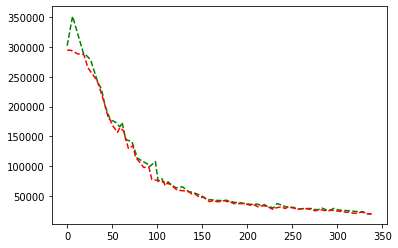

In [2]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
#读取工作簿和工作簿中的工作表

data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))
start=19
end=-1

ydata = data[start:end]
length=len(ydata)
print(length)
xdata = [ i for i in range(length)]
local_max_x=[]
local_max_y=[]
local_min_x=[]
local_min_y=[]
for i in range(length-1):
    if(i==0):
        if(data[i]>data[i+1] and data[i]>data[i+2]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1] and data[i]<data[i+2]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])
    if(i==1):
        if(data[i]>data[i+1] and data[i]>data[i-1] and data[i]>data[i+2]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1] and data[i]<data[i-1] and data[i]<data[i+2]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])
    else:
        if(data[i]>data[i+1] and data[i]>data[i-1] and data[i]>data[i+2] and data[i]>data[i-2]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1] and data[i]<data[i-1] and data[i]<data[i+2] and data[i]<data[i-2]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])    
x=np.linspace(xdata[0], xdata[-1], len(xdata))  
# print(x)          
interp_max = np.interp(x, local_max_x, local_max_y)
interp_min = np.interp(x, local_min_x, local_min_y)
for i in range(len(interp_max)):
    if(interp_max[i]<interp_min[i]):
        temp=interp_min[i]
        interp_min[i]=interp_max[i]
        interp_max[i]=temp
# print(x)       

#print(interp_max)
plt.plot(x,interp_max,'g--')
plt.plot(x,interp_min,'r--')
#plt.savefig("regression")


[302348, 317096.0, 314406.0, 305094.0, 303953.5, 318000.5, 346488.5, 356785.5, 360042.0, 358927.5, 339688.5, 315358.0, 299623.0, 312232.0, 320804.0, 305101.0, 291828.0, 274355.5, 273678.0, 269496.0, 274678.5, 288778.5, 315862.0, 303620.5, 273782.5, 277816.5, 276018.5, 292543.5, 291966.0, 264125.0, 253290.5, 252135.0, 249388.0, 250753.5, 245615.5, 248720.5, 248661.0, 221874.0, 216812.5, 224245.0, 218595.0, 213034.0, 204636.0, 205341.5, 217616.5, 209199.0, 185742.5, 182421.0, 194130.5, 210355.5, 193463.5, 174450.5, 168070.5, 155649.0, 164311.5, 166898.5, 158473.0, 162925.5, 159631.5, 149852.0, 157487.5, 169582.0, 161383.0, 153604.5, 146679.0, 139933.5, 149863.5, 139805.5, 127091.5, 125503.5, 119606.0, 117808.5, 129459.5, 137684.0, 130225.5, 118034.5, 112367.5, 119081.0, 118351.5, 121719.5, 118989.0, 107334.0, 109532.0, 110641.0, 105453.0, 99981.0, 108593.5, 107397.0, 96507.0, 94500.0, 97350.5, 101060.0, 93970.5, 97813.0, 92321.5, 77824.5, 86650.5, 90730.0, 96783.5, 96864.5, 81135.5, 7537

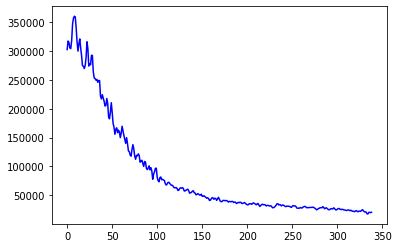

In [11]:
new_ydata=[ydata[0]]
for i in range(1,len(ydata)):
    new_ydata.append((ydata[i]-ydata[i-1])*0.5+ydata[i-1])
plt.plot(xdata,new_ydata,'b-')
print(new_ydata)

In [2]:
def func(x, a, b, c,d):
    return a * np.exp(-(x-d)*b) + c

[ 4.49318800e+05  1.58649467e-02  2.12399254e+04 -1.51024581e+01] [ 4.35578283e+05  1.51983734e-02  1.87390311e+04 -1.90758032e+01]
[23481.58159538 23446.29846186 23411.57067643 23377.38949807
 23343.74632329 23310.63268405 23278.0402456  23245.96080434
 23214.38628584 23183.30874272 23152.72035271 23122.61341666
 23092.9803566  23063.81371383 23035.10614706 23006.85043054
 22979.03945225 22951.66621212 22924.72382026 22898.20549522] [21295.10447828 21256.55004519 21218.57714639 21181.17701032
 21144.34099776 21108.06059975 21072.32743571 21037.13325145
 21002.46991731 20968.32942621 20934.70389188 20901.58554698
 20868.96674135 20836.8399402  20805.19772241 20774.03277877
 20743.33791035 20713.10602677 20683.33014464 20654.00338586]


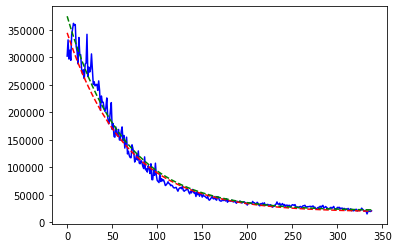

In [4]:
interp_max=np.array(interp_max)
interp_min=np.array(interp_min)
x=np.array(x)
plt.plot(xdata,ydata,'b-')
popt_min, pcov_min = curve_fit(func, x, interp_min,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_min = [func(i, popt_min[0],popt_min[1],popt_min[2],popt_min[3]) for i in xdata]
plt.plot(xdata,y_min,'r--')
popt_max, pcov_max = curve_fit(func, x, interp_max,maxfev=10000,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_max = [func(i, popt_max[0],popt_max[1],popt_max[2],popt_max[3]) for i in xdata]
plt.plot(xdata,y_max,'g--')
y_predict_max=[]
y_predict_min=[]
for k in range(len(ydata)):
    pre_data=k
    y_predict_max.append(func(pre_data, popt_max[0],popt_max[1],popt_max[2],popt_max[3]))
    y_predict_min.append(func(pre_data, popt_min[0],popt_min[1],popt_min[2],popt_min[3]))

print(popt_max,popt_min)
print(np.array(y_predict_max[-20:]),np.array(y_predict_min[-20:]))


In [8]:
gd=[21204,
20380,
22072,
22252,
22018,
22394,
22283,
19725,
21946,
21510,
20248,
22248,
22184,
22606,
20879,
19542,
24058,
22147,
21946,
22775,
22670,
22818]
exp_max=[20943.59,
21982.324,
23239.725,
24064.318,
24847.467,
25650.793,
26434.133,
27232.865,
27774.508,
28405.03,
28809.441,
29170.197,
29882.947,
30674.066,
31585.715,
32521.205,
33477.273,
34468,
35482.934,
36506.64,
37559.914,
38630.816]
exp_min=[17943.59,
18982.324,
20239.725,
21064.318,
21847.467,
22650.793,
23434.133,
24232.865,
24774.508,
25405.03,
25809.441,
26170.197,
26882.947,
27674.066,
28585.715,
29521.205,
30477.273,
31468,
32482.934,
33506.64,
34559.914,
35630.816]
mse=0
for i in range(len(gd)):
    if(gd[i]<exp_min[i] or gd[i]>exp_max[i]):
        mse+=min((gd[i]-exp_min[i])**2,(gd[i]-exp_max[i])**2)
print(mse)
pinaw=0


957829556.8132689


In [ ]:
(1+np.exp(1.5))*

In [4]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
acc=0
total=0
y_pred=[]
y_test=ydata
x_test=xdata
for i in range(len(y_test)):
    if(y_test[i]>y_predict_min[i] and y_test[i]<y_predict_max[i]):
        acc+=1
    total+=1
    y_pred.append((y_predict_min[i]+y_predict_max[i])/2)
print(acc/total)

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))




0.18584070796460178
158048864.20593685
7403.411481049138
0.9789779751105627


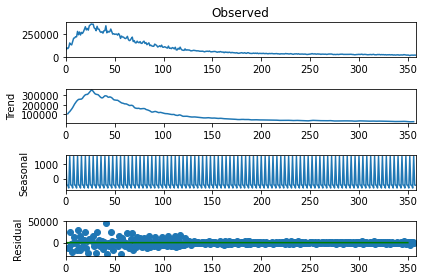

In [5]:
import statsmodels.api as sm
strengths=[]
x_axis=[]
for k in range(len(data)-8):
    ytrend=data[k:]
    res = sm.tsa.seasonal_decompose(ytrend, period=4)
    if(k==0):
        res.plot()
        plt.savefig('decompose')
        # print(list(res.resid)[2:-2])
    x_axis.append(k)
    data_no_trend=ytrend[2:-2]-res.trend[2:-2]
    # print(data_no_trend)
    deseasonal=ytrend[2:-2]-res.seasonal[2:-2]
    # print(deseasonal)
    trend_strength=max(0,1-res.resid[2:-2].var()/deseasonal.var())
    # print(trend_strength)
    strengths.append(trend_strength)

plt.plot([i for i in range(len(data)-8)],strengths,'g-')


In [6]:
batch_size=32
time_step=30
epoch=5000
input_size=2
output_size=1
mid_dim=16
mid_layers=1

In [7]:
# In[122]:
 
class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers,batch):
        super(RegLSTM, self).__init__()
 
        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers,batch_first=batch)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression
 
    def forward(self, x):
        # print(x)
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)
        # print(y)
        batch_size, seq_len, hid_dim = y.shape
        y = y.reshape(-1, hid_dim)
        
        y = self.reg(y)
        
        y = y.reshape(batch_size, seq_len, -1)
        return y
 
 

In [11]:
def load_data(ydata,xdata):
    lstm_data=[np.log(ydata[i]) for i in range(len(ydata))]
    lstm_data=np.diff(lstm_data)
    
    seq_number=np.array(lstm_data,dtype=np.float32)
    #print(seq_number)
    seq_number=seq_number[:,np.newaxis]
    seq_year_month=np.array(xdata[:-1])[:,np.newaxis]
    # print(seq_number)
    # print(seq_year_month)
    #print(seq_year_month.shape)
    seq=np.concatenate((seq_number,seq_year_month),axis=1)
    # print(seq.mean(axis=0),seq.std(axis=0))
    seq=(seq-seq.mean(axis=0))/seq.std(axis=0)
    return(seq)


In [12]:
data_train=load_data(ydata,xdata)
figure=[]
for i in range(len(data_train)):
    
    figure.append(data_train[i][0])
print(figure)
train_size=int(len(data_train)-1)
#print(data_train)

[1.1769853038448788, -1.2029865144892695, 0.7128892404167667, -0.6194566886866062, 1.8042869300673194, 0.43993424035532236, 0.4264823470435267, -0.029188450616522896, 0.1404893597504261, -1.2822063009618518, -0.22926699911250822, -0.7955923481933544, 1.8879114642600436, -1.0309188574548198, 0.07095410605498373, -0.9479482683738621, -0.2883326063904865, 0.4148670900244781, -0.598584173198767, 1.209514382263117, 0.16777248427098537, 2.0259533008098716, -2.872027828989604, 0.8196532940268955, -0.28695609015230233, 0.32083072981773403, 1.1934757008237364, -1.0585568121326212, -1.096897471571354, 0.3325563965388357, -0.257210773897373, 0.18750757242943797, 0.12333080925154702, -0.4285445886340112, 0.8967238700836684, -0.7191703314092235, -1.8195026503913323, 1.5004227512898078, -0.4959842419156356, 0.0916663588959097, -0.5171750865562468, -0.23163437944704782, 0.4939920596679566, 1.0278943314626894, -1.8242732876984507, -0.7003709730766529, 0.47326765475604227, 1.1403415312038672, 0.9234723

In [76]:
data_sample=np.zeros((train_size-time_step+1,time_step,input_size))
label_sample=np.zeros((train_size-time_step+1,time_step,output_size))
for i in range(train_size-time_step+1):
    data_sample[i]=data_train[i:i+time_step,:]
    label_sample[i]=data_train[i+1:i+1+time_step,0:1:]
 

In [77]:
 
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net=RegLSTM(input_size,output_size,mid_dim,mid_layers,True).to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=1e-2)
 

Epoch:    0, Loss: 0.78875
Epoch:  100, Loss: 0.37145
Epoch:  200, Loss: 0.17277
Epoch:  300, Loss: 0.13112
Epoch:  400, Loss: 0.11016
Epoch:  500, Loss: 0.10686
Epoch:  600, Loss: 0.09359
Epoch:  700, Loss: 0.09072
Epoch:  800, Loss: 0.08742
Epoch:  900, Loss: 0.07745
Epoch: 1000, Loss: 0.06893
Epoch: 1100, Loss: 0.07159
Epoch: 1200, Loss: 0.06442
Epoch: 1300, Loss: 0.06793
Epoch: 1400, Loss: 0.06173
Epoch: 1500, Loss: 0.06218
Epoch: 1600, Loss: 0.06265
Epoch: 1700, Loss: 0.05432
Epoch: 1800, Loss: 0.05526
Epoch: 1900, Loss: 0.05508
Epoch: 2000, Loss: 0.15416
Epoch: 2100, Loss: 0.04975
Epoch: 2200, Loss: 0.05009
Epoch: 2300, Loss: 0.04524
Epoch: 2400, Loss: 0.04550
Epoch: 2500, Loss: 0.04326
Epoch: 2600, Loss: 0.04484
Epoch: 2700, Loss: 0.05139
Epoch: 2800, Loss: 0.04209
Epoch: 2900, Loss: 0.04330
Epoch: 3000, Loss: 0.04056
Epoch: 3100, Loss: 0.04408
Epoch: 3200, Loss: 0.03890
Epoch: 3300, Loss: 0.04482
Epoch: 3400, Loss: 0.04077
Epoch: 3500, Loss: 0.04644
Epoch: 3600, Loss: 0.03888
E

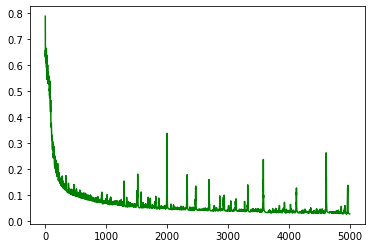

In [78]:
losses=[]
for i in range(epoch):
    for j in range(int((train_size-time_step+1)/batch_size)-1):
        train_X=data_sample[j*batch_size:(j+1)*batch_size,:,:]
        train_Y=label_sample[j*batch_size:(j+1)*batch_size,:,:]
        var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
        var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
        # print(var_x,var_y)
        out = net(var_x)
        loss=criterion(out,var_y)
        #loss = criterion(out[:,-1,:], var_y[:,-1,:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_X=data_sample[(j+1)*batch_size:,:,:]
    train_Y=label_sample[(j+1)*batch_size:,:,:]
    var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
    var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
    out = net(var_x)
    loss = criterion(out, var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    if i%100==0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(i, loss.item()))
epoch=[i for i in range(len(losses))]
plt.plot(epoch,losses,'g-')


-0.052618515813335875
-0.05273211396263733
-0.052844681145218786
-0.05295622048322279
-0.05306673526312444
-0.053176228930517766
-0.05328470508496075
-0.053392167474905605
-0.053498619992694785
-0.05360406666965112
-0.05370851167124613
-0.05381195929233051
-0.05391441395246943
-0.05401588019133641
-0.054116362664208495
-0.05421586613751295
-0.05431439548448935
-0.05441195568090684
-0.05450855180087011
-0.05460418901270003
-0.05469887257491557
-0.05479260783225648
-0.05488540021182153
-0.054977255219277765
-0.05506817843511591
-0.05515817551104796
-0.05524725216640114
-0.05533541418467536
-0.0554226674101006
-0.05550901774430983
-0.05559447114310068
-0.05567903361321491
-0.05576271120926357
-0.05584551003065741
-0.0559274362186617
-0.056008495953493664
-0.056088695451492754
-0.05616804096237615
-0.05624653876654051
-0.05632419517245424
-0.05640101651409779
-0.05647700914847675
-0.05655217945321667
-0.056626533824186254
-0.05670007867321303
-0.05677282042586107
-0.056844765519247886
-0.0

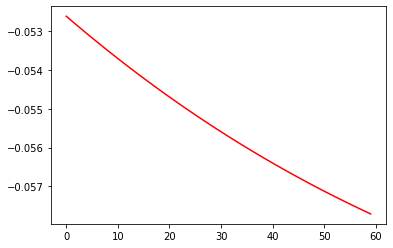

In [79]:
net=net.eval()
lstm_out=list()
reals=list()
new_mean=np.array([-7.86209723e-03  ,1.68500000e+02] )
new_std=np.array([8.57686214e-02 ,9.75717685e+01])
for i in range(60):
    test_x=data_train[-time_step:,:].reshape(1,time_step,input_size)
    test_x=torch.tensor(test_x,dtype=torch.float32,device=device)
    tem=net(test_x).cpu().data.numpy()
    lstm_out.append(tem[0][-1])
    

    for item in data_train:
        item[0]=item[0]*new_std[0]+new_mean[0]
        item[1]=item[1]*new_std[1]+new_mean[1]
    date=train_size+i
    y_yester_max=func(date-1, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
    y_yester_min=func(date-1, popt_min[0],popt_min[1],popt_min[2],popt_min[3])
    y_predict_max=func(date, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
    y_predict_min=func(date, popt_min[0],popt_min[1],popt_min[2],popt_min[3])
    # print(y_predict_min,y_predict_max,y_predict_min,y_predict_max)
    real=(np.log(y_predict_min)+np.log(y_predict_max)-np.log(y_yester_max)-np.log(y_yester_max))/2
    print(real)
    # print(lstm_out)
    reals.append(real)
    xdata=np.append(xdata,(xdata[-1]+1))
    ydata=np.append(ydata,(real))
    new=np.array([[int(real),train_size+1+i]])
    data_train=np.concatenate((data_train,new),axis=0)
    new_mean=data_train.mean(axis=0)
    new_std=data_train.std(axis=0)
    data_train=(data_train-data_train.mean(axis=0))/data_train.std(axis=0)
    
    

    #print(data)
y_test=np.array(reals).reshape((-1,1))





plt.plot(y_test, 'r', label='pred')

 
 

 
 
 



In [80]:

firstday=np.log(ydata[0])
pred=[]
pred.append(firstday)
for item in data_train[:train_size]:
    
    item[0]=item[0]*new_std[0]+new_mean[0]
    item[1]=item[1]*new_std[1]+new_mean[1]
    firstday+=item[0]
    pred.append(firstday)
    print(np.exp(firstday))

for item in reals:
    date=len(data_train)+i
    y_predict_max=func(date, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
    y_predict_min=(func(date, popt_min[0],popt_min[1],popt_min[2],popt_min[3]))
    firstday+=item
    pred.append(firstday)
    print(np.exp(firstday))


331844.0008513118
296968.0001500166
313220.00015299395
294686.99999333004
341314.00230755337
351663.00242208334
361908.00267192913
358176.00256283925
359679.00263535866
319698.0032430243
311018.00321315834
288228.002570476
336236.0048893296
305372.0051763544
304830.00516895123
278826.00457348395
269885.00486623467
277471.00507650635
261521.0049039238
287836.0044221004
289721.00445731665
342003.00744258834
265238.0079145513
282327.0079549873
273306.0081229139
278731.00821246725
306356.0099145133
277576.00875478203
250674.00745682837
255907.00745508543
248363.007445674
250413.0074098885
251094.0074429503
240137.00745385553
257304.00836584484
240018.00770436935
203730.0068549528
229895.0073934424
218595.00667968977
218595.00667996507
207473.00644486453
201799.0061863884
208884.0062484991
226349.00689489476
192049.006994997
179436.0064193087
185406.00670587854
202855.007497291
217856.00798482978
169071.0074809602
179830.0077262424
156311.00707694853
154987.0070517721
173636.00739215087
160

In [82]:
print(train_size)

337


In [81]:

y_yester_max=func(360, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
y_yester_min=func(360, popt_min[0],popt_min[1],popt_min[2],popt_min[3])
y_predict_max=func(361, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
y_predict_min=func(361, popt_min[0],popt_min[1],popt_min[2],popt_min[3])
print(y_yester_max,y_yester_min,y_predict_max,y_predict_min)

22409.63106677466 20109.7549206709 22391.220178737734 20089.079661423224


In [83]:
for i in range(20):
    y_predict_max=func(train_size+i, popt_max[0],popt_max[1],popt_max[2],popt_max[3])
    y_predict_min=func(train_size+i, popt_min[0],popt_min[1],popt_min[2],popt_min[3])
    print((y_predict_max+y_predict_min)/2)

21804.02698244808
21776.1044405374
21748.611769191724
21721.542347507842
21694.889656604537
21668.647278049768
21642.80889231217
21617.368277236408
21592.319306542064
21567.65594834566
21543.37226370548
21519.462405188828
21495.920615461415
21472.741225898448
21449.91865521717
21427.44740813051
21405.322074021446
21383.537325637837
21362.08791780741
21340.968686172502
